# Phân loại bệnh tiểu đường


## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu Pima Indians Diabetes gồm 768 bản ghi của phụ nữ gốc Pima từ 21 tuổi trở lên.
    + Mỗi bản ghi chứa 8 thông số y tế liên quan đến nguy cơ mắc bệnh tiểu đường, cùng với nhãn chẩn đoán cho biết người đó có mắc bệnh hay không.
+ **Dữ liệu vào**:
    + Pregnancies – Số lần mang thai
    + Glucose – Nồng độ glucose trong huyết tương (mg/dL)
    + BloodPressure – Huyết áp tâm trương (mmHg)
    + SkinThickness – Độ dày nếp gấp da (mm)
    + Insulin – Nồng độ insulin trong huyết thanh (µU/mL)
    + BMI – Chỉ số khối cơ thể (kg/m²)
    + DiabetesPedigreeFunction – Hệ số di truyền tiểu đường
    + Age – Tuổi (năm)
+ **Kết quả**:
    + Outcome – 0: Không mắc bệnh tiểu đường, 1: Mắc bệnh tiểu đường


## 2. Chuẩn bị vấn đề (Prepare Problem)



### 2.1 Thư viện cần thiết (Load Libraries)

In [1]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

### 2.2. Nạp dữ liệu (Load Dataset)

In [2]:
# Load dataset
data_path  = r"C:\Users\ASUS\Downloads\Lab02__Pima_Indian_Huỳnh_Nhật_Minh_3123580025\pima-indians-diabetes.csv"
data_names = [
    "Pregnancies", 
    "Glucose", 
    "BloodPressure", 
    "SkinThickness", 
    "Insulin", 
    "BMI", 
    "DiabetesPedigreeFunction", 
    "Age", 
    "Outcome"
]
df_dataset = pd.read_csv(data_path, names=data_names)


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1 Thống kê mô tả

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [3]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:

+ Dữ liệu có 8 thuộc tính đầu vào: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

+ Các thuộc tính này là các chỉ số y tế, đơn vị đo tùy từng loại (mg/dL, mmHg, chỉ số BMI,…).

+ Tổng số dòng dữ liệu là 768 dòng.

+ Thuộc tính mục tiêu (nhãn phân lớp) là cột Outcome (0 = không mắc, 1 = mắc tiểu đường).

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [4]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()

print('Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated > 0:
    # Ví dụ truy vấn một bản ghi cụ thể trong bộ Pima (chỉ để minh họa)
    s_query1 = "`Pregnancies`==6 and `Glucose`==148 and `Outcome`==1"
    s_query2 = "`Pregnancies`==1 and `Glucose`==85  and `Outcome`==0"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng: 0


**Nhận xét**:

+ Dữ liệu không có giá trị rỗng (Null, NaN).
+ Số dòng bị trùng bằng 0, vì vậy không tồn tại bản ghi trùng lặp trong tập Pima Indians Diabetes.

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [5]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Nhận xét:

Bộ dữ liệu gồm 8 thuộc tính đầu vào với đặc điểm và khoảng giá trị như sau:

+ Pregnancies: số lần mang thai, từ 0 – 17.

+  Glucose: mức đường huyết, từ 0 – 199 mg/dL.

+ BloodPressure: huyết áp tâm trương, từ 0 – 122 mmHg.

+ SkinThickness: độ dày da gấp, từ 0 – 99 mm.

+ Insulin: nồng độ insulin, từ 0 – 846 µU/mL.

+ BMI: chỉ số khối cơ thể, từ 0 – 67.1.

+ DiabetesPedigreeFunction: hệ số di truyền tiểu đường, từ 0.078 – 2.42.

+ Age: tuổi, từ 21 – 81.

+ Thuộc tính mục tiêu Outcome nhận giá trị 0 hoặc 1 (không/ có tiểu đường).

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Outcome) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [6]:
df_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:

+ Dữ liệu cần phân loại 2 lớp kết quả của bệnh tiểu đường: 0 (không mắc) và 1 (mắc).
+ Các lớp không cân bằng, trong đó lớp 0 có 500 mẫu và lớp 1 có 268 mẫu.

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

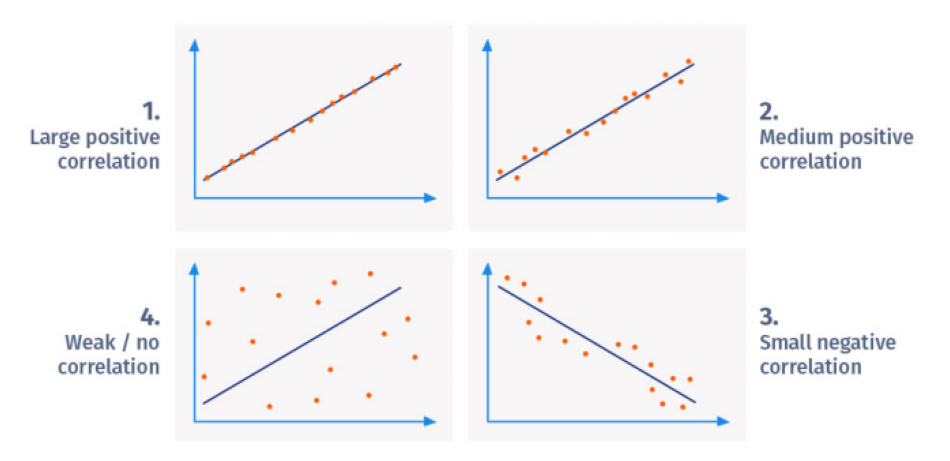

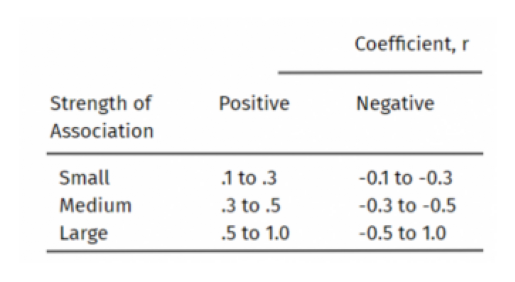

In [8]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("corr2.png")), plt.axis("off"), plt.show();

In [9]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:

+ Các cặp thuộc tính có độ tương quan Pearson cao trong bộ Pima Indians Diabetes gồm:

+ (SkinThickness, Insulin) = 0.437

+ (BMI, SkinThickness) = 0.393

+ (Insulin, Glucose) = 0.331

+ (BMI, BloodPressure) = 0.282

Ngoài ra, biến mục tiêu Outcome tương quan mạnh nhất với:

+ Glucose = 0.467

+ BMI = 0.293

+ Age = 0.238.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

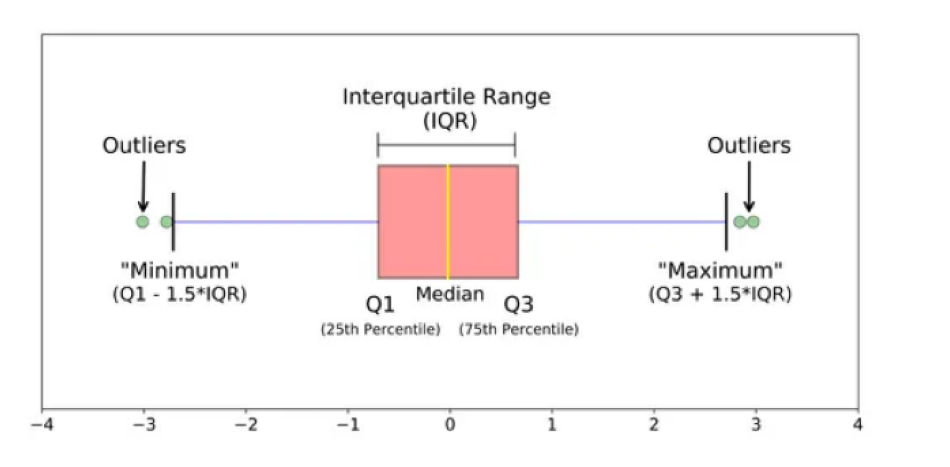

In [8]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("boxplots.png")), plt.axis("off"), plt.show();

<Axes: >

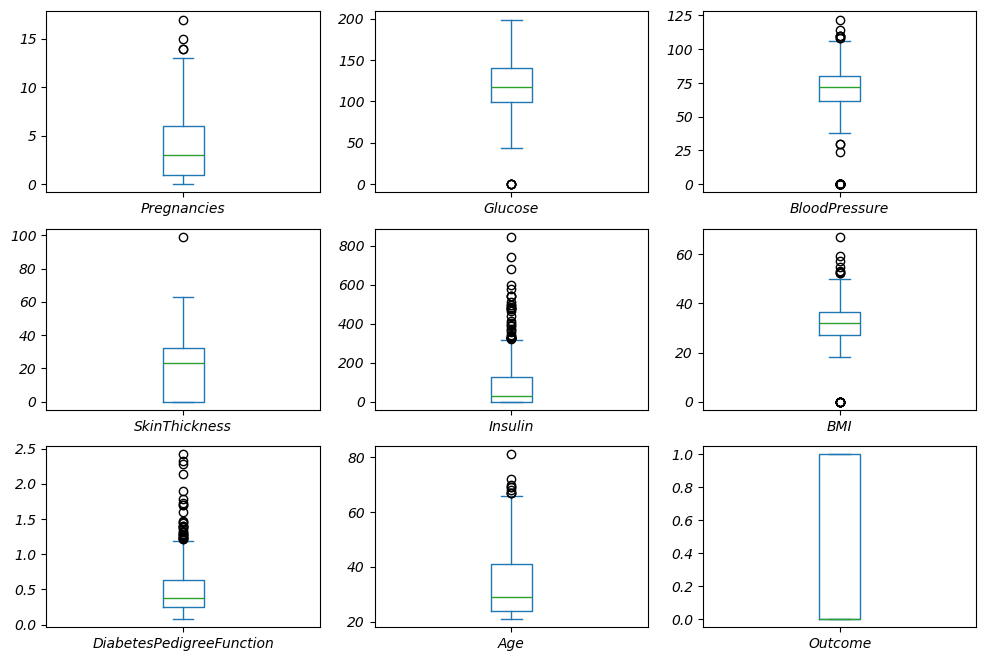

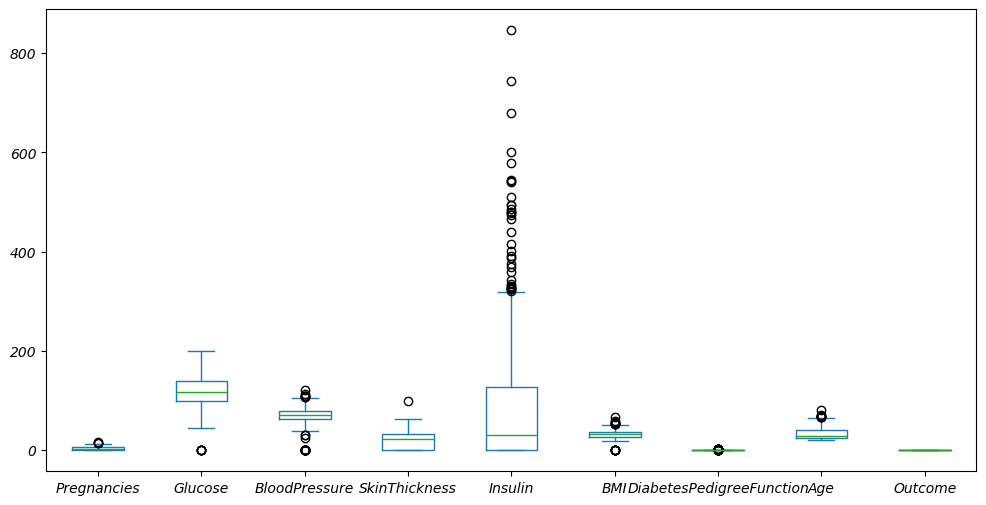

In [10]:
# Boxplot từng cột trên nhiều ô
df_dataset.plot(
    kind="box",
    subplots=True,
    layout=(3, 3),   # 3x3 phù hợp với 9 cột
    sharex=False,
    sharey=False,
    figsize=(12, 8)
)

# Boxplot tổng hợp tất cả cột trên 1 hình
df_dataset.plot(kind="box", figsize=(12, 6))


**Nhận xét**
+ 

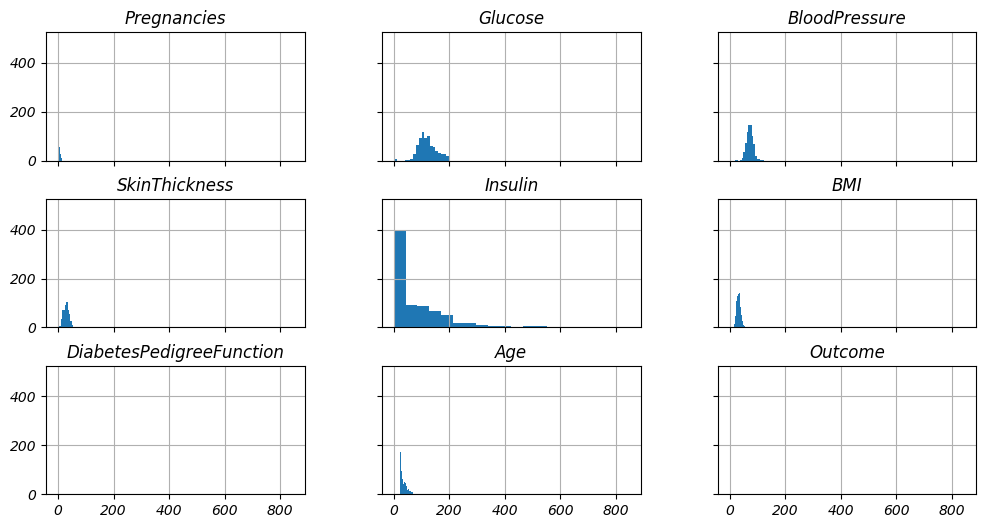

In [11]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

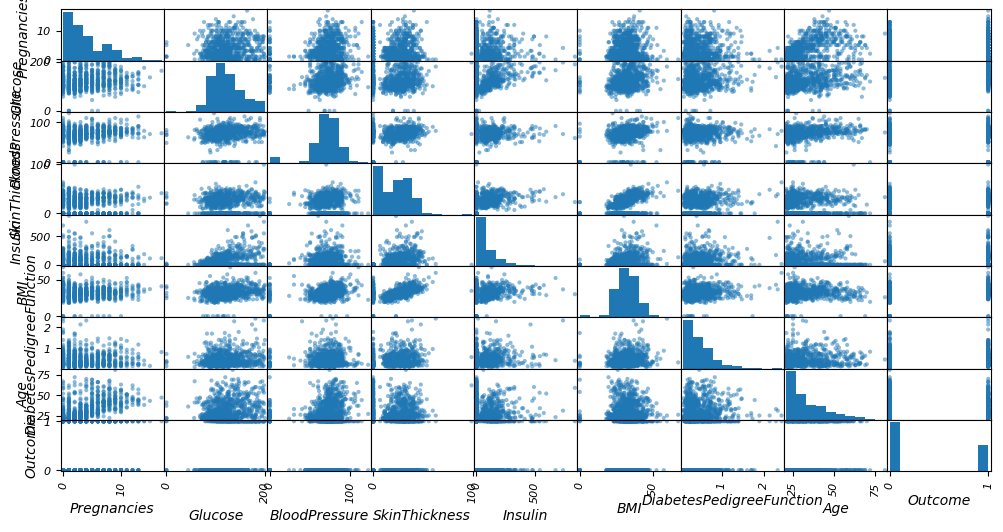

In [12]:
pd.plotting.scatter_matrix(df_dataset, figsize=(12,6));

Nhận xét:
+ Các cặp tính chất có độ tương đồng cao:
    + (Pregnancies, Age) = 0.544
    + (Glucose, Insulin) = 0.331
    + (SkinThickness, Insulin) = 0.437
    + (SkinThickness, BMI) = 0.393


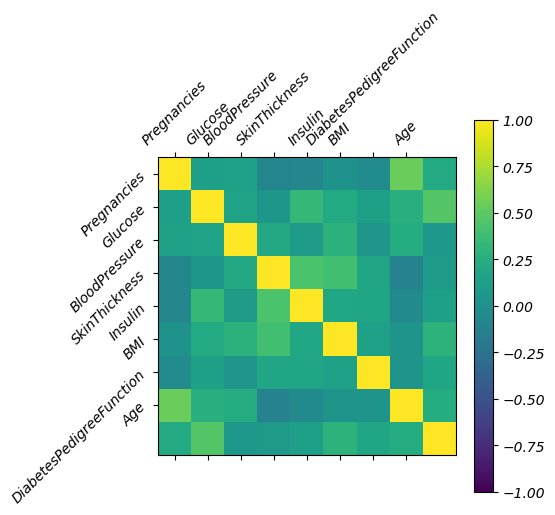

In [16]:
plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar()

# số cột trừ cột Outcome nếu muốn chỉ hiển thị thuộc tính đầu vào
num_cols = len(df_dataset.columns[:-1])

plt.xticks(np.arange(num_cols), rotation=45)
plt.yticks(np.arange(num_cols), rotation=45)
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]))
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]))
plt.show()


## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [12]:
df_clean = df_dataset.copy()

In [13]:
display.display(df_dataset[df_dataset.duplicated()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
# Ví dụ chọn các hàng có điều kiện cụ thể
s_query1 = "`Pregnancies`==6 and `Glucose`==148 and `Outcome`==1"
s_query2 = "`Pregnancies`==1 and `Glucose`==85 and `Outcome`==0"

display.display(df_dataset.query(s_query1))
display.display(df_dataset.query(s_query2))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0


In [15]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [16]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm: 

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm: 

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)

In [24]:
# Example:
df_example = pd.read_csv("data/Data.csv")
df_example

FileNotFoundError: [Errno 2] No such file or directory: 'data/Data.csv'

In [25]:
# Chúng ta xóa bỏ cột tính chất vi phạm
df_example.drop("Salary", axis = 1)

NameError: name 'df_example' is not defined

In [26]:
# Chúng ta xóa bỏ các dòng vi phạm
df_example.dropna(subset=["Salary", "Age"])

NameError: name 'df_example' is not defined

In [27]:
# Điền giá trị hằng số (cho cột Age) hoặc median (cho cột Salary)
df_example["Age"].fillna(0, inplace=True)
median = df_example["Salary"].median()
df_example["Salary"].fillna(median, inplace=True)
df_example

NameError: name 'df_example' is not defined

### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

### Giai thích
Đối với bộ dữ liệu Pima Indians Diabetes, cột **Outcome** vốn đã ở dạng số (0 = không mắc tiểu đường, 1 = mắc tiểu đường).  
Vì vậy **không cần** thực hiện bước mã hóa nhãn bằng `LabelEncoder` như trong ví dụ Iris.

> Code ví dụ của Iris (chỉ minh họa, **không áp dụng cho Pima**):
```python
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["class"])
class_names = class_encoder.classes_
print(class_names)


```python
class_encoder.transform(df_clean["class"])


```python
df_clean["class"] = class_encoder.transform(df_clean["class"])
df_clean

##### Example

In [ ]:
purchased_encoder = LabelEncoder()
purchased_encoder.fit(df_example["Purchased"])
purchased_names = purchased_encoder.classes_
print(purchased_names)
print(purchased_encoder.transform(df_example["Purchased"]))

In [ ]:
df_example["Purchased"] = purchased_encoder.transform(df_example["Purchased"])
df_example

#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn. 

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

Đối với bộ dữ liệu **Pima Indians Diabetes**:

* Cột **Outcome** đã là dữ liệu số (0 = không mắc tiểu đường, 1 = mắc tiểu đường)  
  ⇒ **không cần** dùng `LabelEncoder` như ví dụ Iris.
* Tất cả các cột còn lại (**Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age**)  
  đều là dữ liệu số, **không có cột dạng danh mục (categorical)**  
  ⇒ **không cần** chuyển đổi dữ liệu danh mục sang dạng **One-Hot**.

In [ ]:
# Áp dụng cho cột country
df_contry_onehot = pd.get_dummies(df_example["Country"])
df_contry_onehot

In [ ]:
df_contry_onehot = pd.DataFrame(df_contry_onehot.values, 
                                columns=["Is_France", "Is_Germany", "Is_Spain"])
df_contry_onehot

In [ ]:
df_example = df_example.drop("Country", axis = 1)
df_example = df_contry_onehot.join(df_example)
df_example

#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [17]:
# Min-Max Normalization
scale_columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])

df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


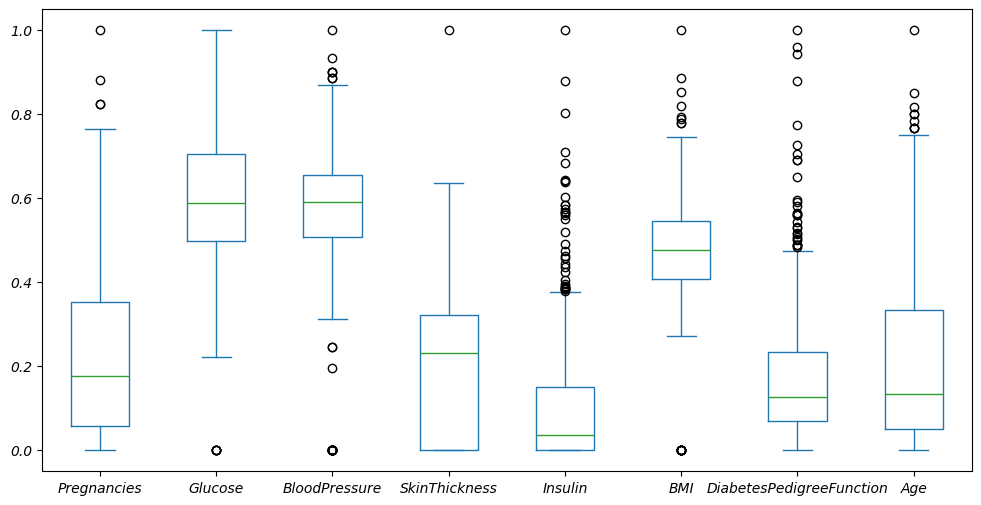

In [18]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

**Nhận xét sau Min-Max Normalization**

* Tất cả các đặc trưng đầu vào (Pregnancies, Glucose, BloodPressure, SkinThickness,  
  Insulin, BMI, DiabetesPedigreeFunction, Age) đã được đưa về **khoảng [0, 1]**.

* Hộp dữ liệu (boxplot) cho thấy:
  * **Insulin** và **SkinThickness** có nhiều giá trị ngoại lai (outliers) nằm sát 0 hoặc cao gần 1.
  * **Glucose** và **BloodPressure** phân bố khá tập trung quanh giá trị chuẩn hóa 0.5–0.6.
  * Các cột còn lại trải rộng nhưng phần lớn giá trị nằm ở nửa dưới (0–0.4).


In [19]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])

df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


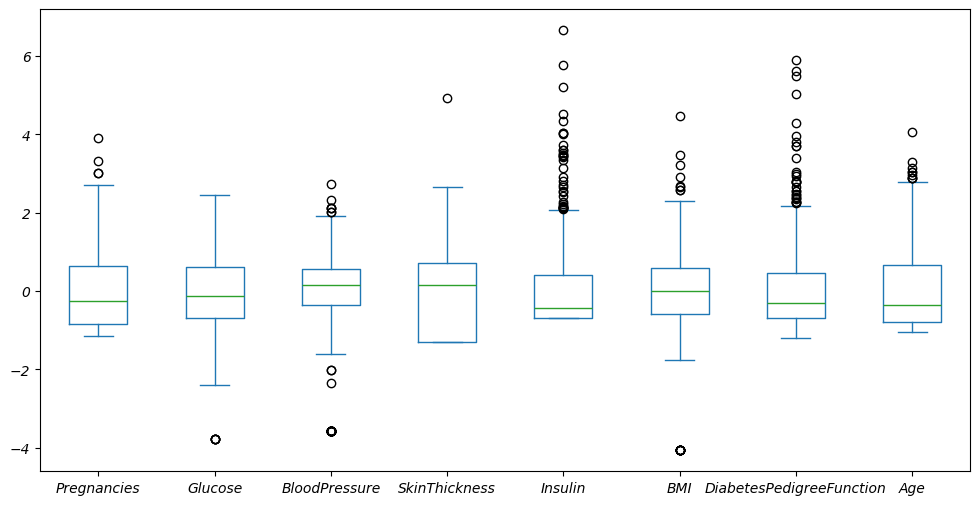

In [20]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

**Nhận xét sau Standard Normalization**

* Tất cả các đặc trưng đầu vào đã được chuẩn hóa theo phân phối chuẩn  
  với **trung bình ≈ 0** và **độ lệch chuẩn ≈ 1**.

* Hộp dữ liệu (boxplot) cho thấy:
  * Các cột đều có tâm phân bố quanh 0, độ trải rộng khoảng từ -2 đến +2.
  * **Insulin** và **SkinThickness** vẫn xuất hiện nhiều giá trị ngoại lai (outliers) lớn hơn 4–6.
  * Các cột khác như **Glucose**, **BMI**, **Age** phân bố khá cân đối quanh 0.


In [21]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [22]:
X_data = df_clean.values[:, :-1]
y_data = df_clean.values[:, -1].astype(int)   # ép nhãn về int

print(X_data.shape, y_data.shape)
print(X_data[:20, :])
print(y_data[:20])


(768, 8) (768,)
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[  5.    121.     72.     23.    112.     26.2     0.245  30.   ]
 [  1.    130.     60.     23.    170.     28.6     0.692  21.   ]
 [  4.    110.     92.      0.      0.     37.6     0.191  30.   ]
 [  7.    107.     74.      0.      0.     29.6     0.254  31.   ]
 [  9.    164.     84.     21.      0.     30.8     0.831  32.   ]]
Output = [0 0 0 1 1]
+ Test: shape=(231, 8)
Input = 
[[  0.    179.     50.     36.    159.     37.8     0.455  22.   ]
 [  2.    100.     68.     25.     71.     38.5     0.324  26.   ]
 [  4.     90.      0.      0.      0.     28.      0.61   31.   ]
 [  0.     73.      0.      0.      0.     21.1     0.342  25.   ]
 [  1.     97.     68.     21.      0.     27.2     1.095  22.   ]]
Output = [1 0 0 0 0]


In [24]:
# Lưu thông tin
save_dir = "exps/pima"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz',
         X_train=X_train, X_test=X_test,
         y_train=y_train, y_test=y_test)

# Save cleaned data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

# Nếu vẫn muốn lưu encoder để đồng bộ quy trình (dù không cần thiết):
# joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)


['data.npz', 'df_clean.xlsx']

In [25]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()


dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [26]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Giải thích
File pima-indians-diabetes.csv chỉ có biến số và nhãn Outcome đã là số (0 hoặc 1).

Do đó:
+ Không cần LabelEncoder → không cần joblib.load(...).classes_.
joblib.load(...).classes_ chỉ cần nếu data có nhãn dạng chữ (ví dụ "Positive", "Negative" hoặc "Diabetes", "Healthy").

```python
joblib.load(f'{save_dir}/class_encoder.joblib').classes_


# Kết thúc